<a href="https://colab.research.google.com/github/yeonsikC/Deep-Learning-with-Keras-Founders/blob/master/DL_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 케라스 실습 시작

In [0]:
from keras import models
from keras import layers

# Sequential형
model = models.Sequential()
model.add(layers.Dense(32, activation = 'relu', input_shape=(784,)))
model.add(layers.Dense(10, activation = 'softmax'))

Using TensorFlow backend.


In [0]:
# 함수형
input_tensor = layers.Input(shape=(784,))
x = layers.Dense(32, activation='relu')(input_tensor)
output_tensor = layers.Dense(10, activation = 'softmax')(x)

model = models.Model(inputs = input_tensor, outputs = output_tensor)

In [0]:
# from keras import optimizers
# model.compile(optimizer=optimizers.RMSprop(lr=0.001),
#               loss='mse',
#               metrics=['accuracy'])
# model.fit(input_tensor, output_tensor, batch_size=128, epochs=10)

# 영화 리뷰 분류 : 이진 분류 예제

In [0]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 1s 0us/step


In [0]:
train_data[0][:5]

[1, 14, 22, 16, 43]

In [0]:
train_labels[0]

1

In [0]:
max([max(sequence) for sequence in train_data])

9999

In [0]:
# 숫자를 단어로 매핑
word_index = imdb.get_word_index() # word_index = BOW
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]]) # '?'가 뭐지?? 

1646592/1641221 [==============================] - 0s 0us/step


In [0]:
# 데이터 준비 , 리스트 -> 텐서
# 정수 시퀀스를 이진 행렬로 인코딩하기

import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

x_train = vectorize_sequences(train_data) #훈련데이터를 벡터화
x_test = vectorize_sequences(test_data) #테스트데이터를 벡터화

In [0]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [0]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [0]:
#신경망 모델 만들기
# relu 활성화 함수는 딥러닝에서 가장 인기 있는 활성화 함수
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [0]:
# binary-crossentropy : 이진 분류 문제, 신경망의 출력이 확률이기 때문에 손실함수로 적합, mean_squared_error도 있음(mse)
# 확률을 출력하는 모델을 사용할 때는 크로스엔트로피가 최선의 선택이다.
# 크로스엔트로피 : 확률 분포 간의 차이를 측정한다. (원본분포와 예측분포 사이를 측정)
# 모델 컴파일하기

model.compile(optimizer='rmsprop', # optimizers.RMSprop(lr=0.001) 처럼 매개변수를 지정할 때 사용
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [0]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

# model.fit은 History 객체를 반환함
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))




Train on 15000 samples, validate on 10000 samples
Epoch 1/20





15000/15000 [==============================] - 2s 143us/step - loss: 0.5088 - acc: 0.7844 - val_loss: 0.3847 - val_acc: 0.8642
Epoch 2/20
15000/15000 [==============================] - 1s 97us/step - loss: 0.2993 - acc: 0.9062 - val_loss: 0.3410 - val_acc: 0.8591
Epoch 3/20
15000/15000 [==============================] - 1s 96us/step - loss: 0.2207 - acc: 0.9260 - val_loss: 0.2767 - val_acc: 0.8915
Epoch 4/20
15000/15000 [==============================] - 1s 96us/step - loss: 0.1736 - acc: 0.9438 - val_loss: 0.2797 - val_acc: 0.8877
Epoch 5/20
15000/15000 [==============================] - 1s 98us/step - loss: 0.1407 - acc: 0.9563 - val_loss: 0.2817 - val_acc: 0.8874
Epoch 6/20
15000/15000 [==============================] - 1s 96us/step - loss: 0.1163 - acc: 0.9633 - val_loss: 0.2937 - val_acc: 0.8856
Epoch 7/20
15000/15000 [==============================] - 1s 95us/step - loss: 0.0975 - acc: 0.9714 - val_loss: 0.3229 

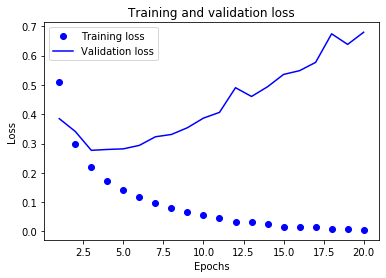

In [0]:
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label = 'Training loss') # bo는 파란색 점을 의미
plt.plot(epochs, val_loss, 'b', label = 'Validation loss') # b는 파란색 실선을 의미
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

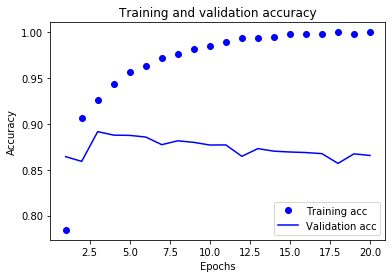

In [0]:
plt.clf() # 그래프를 초기화한다.
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [0]:
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 2s 93us/step - loss: 0.4433 - acc: 0.8281
Epoch 2/4
25000/25000 [==============================] - 2s 76us/step - loss: 0.2621 - acc: 0.9089
Epoch 3/4
25000/25000 [==============================] - 2s 74us/step - loss: 0.2017 - acc: 0.9290
Epoch 4/4
25000/25000 [==============================] - 2s 85us/step


In [0]:
model.evaluate(x_test, y_test)

25000/25000 [==============================] - 2s 78us/step


[0.2901100524044037, 0.88504]

In [0]:
model.predict(x_test)

array([[0.20408407],
       [0.9999223 ],
       [0.84951836],
       ...,
       [0.11066487],
       [0.07177949],
       [0.67150974]], dtype=float32)

# layer을 2에서 1로 줄여보자!

In [0]:
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 2s 98us/step - loss: 0.4531 - acc: 0.8261
Epoch 2/4
25000/25000 [==============================] - 2s 74us/step - loss: 0.2800 - acc: 0.9076
Epoch 3/4
25000/25000 [==============================] - 2s 74us/step - loss: 0.2224 - acc: 0.9236
Epoch 4/4
25000/25000 [==============================] - 2s 77us/step


In [0]:
model.evaluate(x_test, y_test)

25000/25000 [==============================] - 2s 72us/step


[0.2796249929714203, 0.88804]

In [0]:
model.predict(x_test)

array([[0.234321  ],
       [0.9990938 ],
       [0.8895353 ],
       ...,
       [0.1448287 ],
       [0.10541713],
       [0.50418824]], dtype=float32)

# layer을 2에서 3으로 늘려보자!

In [0]:
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 2s 96us/step - loss: 0.4405 - acc: 0.8152
Epoch 2/4
25000/25000 [==============================] - 2s 73us/step - loss: 0.2507 - acc: 0.9084
Epoch 3/4
25000/25000 [==============================] - 2s 74us/step - loss: 0.1946 - acc: 0.9279
Epoch 4/4
25000/25000 [==============================] - 2s 78us/step


In [0]:
model.evaluate(x_test, y_test)

25000/25000 [==============================] - 2s 70us/step


[0.31183319145202637, 0.87968]

In [0]:
model.predict(x_test)

array([[0.20209426],
       [0.9999729 ],
       [0.9700789 ],
       ...,
       [0.13471362],
       [0.08202022],
       [0.78395885]], dtype=float32)

# 레이어 2, 유닛 수 32개

In [0]:
model = models.Sequential()
model.add(layers.Dense(32, activation = 'relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation = 'relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 4s 164us/step - loss: 0.4203 - acc: 0.8190
Epoch 2/4
25000/25000 [==============================] - 2s 89us/step - loss: 0.2403 - acc: 0.9098
Epoch 3/4
25000/25000 [==============================] - 2s 85us/step - loss: 0.1901 - acc: 0.9301
Epoch 4/4
25000/25000 [==============================] - 4s 152us/step


In [0]:
model.evaluate(x_test, y_test)

25000/25000 [==============================] - 2s 85us/step


[0.3334533141708374, 0.87152]

In [0]:
model.predict(x_test)

array([[0.14805293],
       [0.9998992 ],
       [0.6627844 ],
       ...,
       [0.11715287],
       [0.03353629],
       [0.5008956 ]], dtype=float32)

# 레이어 3, 유닛 수 *64개*

In [0]:
model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 3s 139us/step - loss: 0.4365 - acc: 0.8035
Epoch 2/4
25000/25000 [==============================] - 3s 112us/step - loss: 0.2533 - acc: 0.9020
Epoch 3/4
25000/25000 [==============================] - 3s 112us/step - loss: 0.1955 - acc: 0.9236
Epoch 4/4
25000/25000 [==============================] - 2s 94us/step


In [0]:
model.evaluate(x_test, y_test)

25000/25000 [==============================] - 2s 93us/step


[0.3691492634296417, 0.86708]

In [0]:
model.predict(x_test)

array([[0.08399662],
       [0.9998456 ],
       [0.6569927 ],
       ...,
       [0.04904139],
       [0.02312928],
       [0.46774295]], dtype=float32)

In [0]:
import keras
keras.__version__

'2.2.5'

# 뉴스 기사 분류 / 다중 분류 모델

In [1]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

Using TensorFlow backend.


2113536/2110848 [==============================] - 0s 0us/step


In [2]:
len(train_data)

8982

In [3]:
len(test_data)

2246

In [4]:
train_data[10][:5]

[1, 245, 273, 207, 156]

In [5]:
# 단어로 디코딩
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# dict.get에 있는 '?'는 가져올 값이 없을 때 가져올 값을 지정해줌.
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

557056/550378 [==============================] - 0s 0us/step


In [6]:
train_labels[10]

3

In [0]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# 훈련 데이터 벡터 변환
x_train = vectorize_sequences(train_data)
# 테스트 데이터 벡터 변환
x_test = vectorize_sequences(test_data)

In [0]:
# 위에 대한 케라스 내장 함수가 있음
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [9]:
#모델 구축

from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [10]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [12]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 7982 samples, validate on 1000 samples
Epoch 1/20





7982/7982 [==============================] - 2s 199us/step - loss: 2.5888 - acc: 0.4709 - val_loss: 1.7380 - val_acc: 0.6710
Epoch 2/20
7982/7982 [==============================] - 1s 116us/step - loss: 1.4064 - acc: 0.7105 - val_loss: 1.3448 - val_acc: 0.7030
Epoch 3/20
7982/7982 [==============================] - 1s 122us/step - loss: 1.0594 - acc: 0.7732 - val_loss: 1.1990 - val_acc: 0.7350
Epoch 4/20
7982/7982 [==============================] - 1s 123us/step - loss: 0.8363 - acc: 0.8225 - val_loss: 1.0422 - val_acc: 0.7740
Epoch 5/20
7982/7982 [==============================] - 1s 122us/step - loss: 0.6607 - acc: 0.8596 - val_loss: 0.9607 - val_acc: 0.8020
Epoch 6/20
7982/7982 [==============================] - 1s 120us/step - loss: 0.5273 - acc: 0.8890 - val_loss: 0.9266 - val_acc: 0.8040
Epoch 7/20
7982/7982 [============

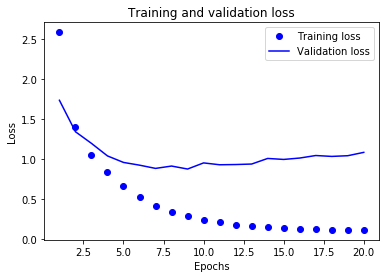

In [13]:
# 훈련과 검증 손실 그리기
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

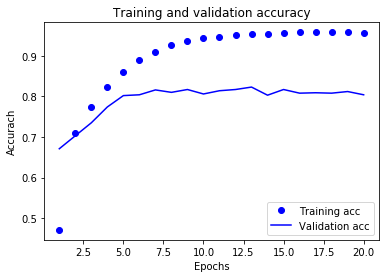

In [14]:
#훈련과 검증 정확도 그리기
plt.clf() # 그래프 초기화

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accurach')
plt.legend()

plt.show()

In [15]:
#모델을 처음부터 다시 훈련하기
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 152us/step - loss: 2.5686 - acc: 0.5398 - val_loss: 1.6959 - val_acc: 0.6480
Epoch 2/9
7982/7982 [==============================] - 1s 123us/step - loss: 1.3866 - acc: 0.7156 - val_loss: 1.2818 - val_acc: 0.7290
Epoch 3/9
7982/7982 [==============================] - 1s 125us/step - loss: 1.0188 - acc: 0.7875 - val_loss: 1.1036 - val_acc: 0.7680
Epoch 4/9
7982/7982 [==============================] - 1s 121us/step - loss: 0.8014 - acc: 0.8305 - val_loss: 1.0227 - val_acc: 0.7790
Epoch 5/9
7982/7982 [==============================] - 1s 126us/step - loss: 0.6395 - acc: 0.8657 - val_loss: 0.9698 - val_acc: 0.8000
Epoch 6/9
7982/7982 [==============================] - 1s 124us/step - loss: 0.5129 - acc: 0.8931 - val_loss: 0.8928 - val_acc: 0.8140
Epoch 7/9
7982/7982 [==============================] - 1s 124us/step - loss: 0.4191 - acc: 0.9095 - val_loss: 0.8784 - val_acc: 0.8110
Epoch 8

In [16]:
results

[1.054163360213554, 0.7769367765180787]

In [17]:
#무작위로 데이터를 분류하면 확률이 18%
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

0.17898486197684774

In [0]:
# 새로운 데이터에 대해 예측하기
predictions = model.predict(x_test)

In [19]:
predictions[0].shape

(46,)

In [20]:
np.sum(predictions[0])

1.0000001

In [22]:
np.argmax(predictions[0])

4

In [0]:
# 레이블과 손실을 다루는 방법